In [5]:
#from CTRNN.CTRNN.ctrnn import CTRNN
#from CTRNN.ctrnn import CTRNN
from stochsearch import EvolSearch
import numpy as np
import matplotlib.pyplot as plt


"""
how to solve?

how to calculate the sound output from both neuron states? multiple ways are possible

"""

'\nhow to solve?\n\nhow to calculate the sound output from both neuron states? multiple ways are possible\n\n'

In [8]:
# our custom ctrnn

import numpy as np
from scipy.sparse import csr_matrix

class CTRNN:

    def __init__(self,size=2,step_size=0.1):
        '''
        Constructer that initializes a random network
        with unit time-constants and biases
        ARGS:
        size: integer = network size
        step_size:float = euler integration step size
        '''
        self.size = size
        self.step_size = step_size
        self.taus = np.ones(size)
        self.biases = np.ones(size)
        self.gains = np.ones(size)
        self.weights = csr_matrix(np.random.rand(size,size))
        self.states = np.random.rand(size)
        self.outputs = self.sigmoid(self.states)
        self.sound_output = np.ones(1)

    @property
    def taus(self): return self.__taus

    @property
    def biases(self): return self.__biases

    @property
    def gains(self): return self.__gains

    @property
    def states(self): return self.__states

    @property
    def outputs(self): return self.__outputs

    @property
    def sound_output(self): return self.__sound_output


    @taus.setter
    def taus(self,ts):
        '''
        Set time-constants
        args = ts:array[size,] = time-constant for each neuron
        '''
        if len(ts) != self.size:
            raise Exception("Size mismatch error - len(taus) != network_size")
        self.__taus = np.asarray(ts)

    @biases.setter
    def biases(self,bis):
        '''
        Set biases
        args = bis:array[size,] = bias for each neuron
        '''
        if len(bis) != self.size:
            raise Exception("Size mismatch - len(biases) != network_size")
        self.__biases = np.asarray(bis)

    @gains.setter
    def gains(self,gs):
        '''
        Set gains
        args = gs:array[size,] = gain for each neuron
        '''
        if len(gs) != self.size:
            raise Exception("Size mismatch - len(gains) != network_size")
        self.__gains = np.asarray(gs)

    @states.setter
    def states(self,s):
        '''
        Set states
        args = s:array[size,] = state for each neuron
        '''
        if len(s) != self.size:
            raise Exception("Size mismatch - len(states) != network_size")
        self.__states = np.asarray(s)
        self.__outputs = self.sigmoid(s)

    @outputs.setter
    def outputs(self,o):
        '''
        Set outputs
        args = o:array[size,] = output for each neuron
        '''
        if len(o) != self.size:
            raise Exception("Size mismatch - len(outputs) != network_size")
        self.__outputs = np.asarray(o)
        self.__states = self.inverse_sigmoid(o)/self.gains - self.biases

    @sound_output.setter
    def sound_output(self,o):
        '''
        Set sound outputs
        args = o:array[size,] = output for neuron
        '''
        self.__sound_output = np.asarray(o)
        

    def randomize_states(self,lb,ub):
        '''
        Randomize states in range [lb,ub]
        args = lb:float = lower bound for random range
                ub:float = upper bound for random range
        '''
        self.states = np.random.uniform(lb,ub,size=(self.size))

    def randomize_outputs(self,lb,ub):
        '''
        Randomize outputs in range [lb,ub]
        args = lb:float = lower bound for random range
                ub:float = upper bound for random range
        '''
        self.outputs = np.random.uniform(lb,ub,size=(self.size))

    def euler_step(self,external_inputs):
        '''
        Euler stepping the network by self.step_size with provided inputs
        args = external_inputs:array[size,] = one float input per neuron
        '''
        if len(external_inputs) != self.size:
            raise Exception("Size mismatch - len(external_inputs) != network_size")
        external_inputs = np.asarray(external_inputs)
        total_inputs = external_inputs + self.weights.dot(self.outputs)
        self.states += self.step_size*(1/self.taus)* (total_inputs - self.states)
        self.outputs = self.sigmoid(self.gains*(self.states + self.biases))

        # how do we want to calculate sound output? a + b or a - b or a/b
        self.sound_output = self.sigmoid(self.states[0] / self.states[1])

    def sigmoid(self,s):
        '''
        Computes the sigmoid function on input array
        args = s:array of any Size
        output = sigmoid(s):array of same size as input
        '''
        return 1/(1+np.exp(-s))

    def inverse_sigmoid(self,o):
        '''
        Computes the inverse of the sigmoid function
        args = o:array of any size
        returns = inverse_sigmoid(o):array same size as o
        '''

        inverse_sig = np.log(o/(1-o))
        #inverse_sig[np.isinf(inverse_sig)] = 0.
        return inverse_sig

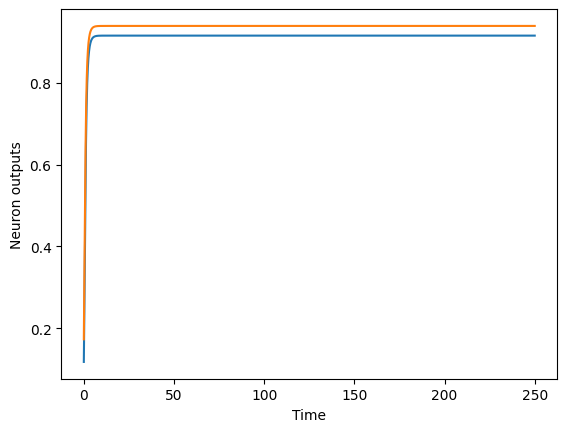

In [9]:
# params
run_duration = 250
net_size = 2
step_size = 0.01

# sound_input needs to be taken from webot, updated after every computational or time step 
sound_input_0 = [0.1]
sound_input_1 = [0.1]

# set up network
network_0 = CTRNN(size=net_size,step_size=step_size)
#network_0.taus = np.random.rand(net_size) # [1.,1.]
#network_0.biases = np.random.rand(net_size) #[-2.75,-1.75]
#network_0.weights[0,0] = 4.5
#network_0.weights[0,1] = 1
#network_0.weights[1,0] = -1
#network_0.weights[1,1] = 4.5

# TODO setup second CTRNN
network_1 = CTRNN(size=net_size,step_size=step_size)
#network_1.taus = [1.,1.]
#network_1.biases = [-2.75,-1.75]
#network_1.weights[0,0] = 4.5
#network_1.weights[0,1] = 1
#network_1.weights[1,0] = -1
#network_1.weights[1,1] = 4.5

# initialize network
network_0.randomize_outputs(0.1,0.2)
network_1.randomize_outputs(0.1,0.2)

# simulate network
outputs_0 = []
outputs_1 = []

for _ in range(int(run_duration/step_size)):
    # TODO read sound input for both CTRNN
    network_0.euler_step(sound_input_0 * net_size) # zero external_inputs
    network_1.euler_step(sound_input_1 * net_size) # zero external_inputs

    outputs_0.append([network_0.outputs[i] for i in range(net_size)])
    outputs_1.append([network_1.outputs[i] for i in range(net_size)])

    # TODO send output to webots and both robots

# reshape to array
outputs_0 = np.asarray(outputs_0)
outputs_1 = np.asarray(outputs_1)

# plot oscillator output
plt.plot(np.arange(0,run_duration,step_size),outputs_0[:,0])
plt.plot(np.arange(0,run_duration,step_size),outputs_1[:,1])
plt.xlabel('Time')
plt.ylabel('Neuron outputs')
plt.show()

In [3]:
# access nn output 
print(network.outputs)
#network.outputs = [0.5,0.75,0.4]

[0.81047031 0.58190934]


# Search

In [ ]:
def fitness_function():
    

In [ ]:
evol_params = {
    'num_processes' : 4, # (optional) number of proccesses for multiprocessing.Pool
    'pop_size' : 100,    # population size
    'genotype_size': 10, # dimensionality of solution
    'fitness_function': fitness_function, # custom function defined to evaluate fitness of a solution
    'elitist_fraction': 0.04, # fraction of population retained as is between generations
    'mutation_variance': 0.05, # mutation noise added to offspring.
    'fitness_args': np.arange(100), # (optional) fitness_function *argv, len(list) should be 1 or pop_size
}


es = EvolSearch(evol_params)

# just iterate
num_gens = 100
es.execute_search(num_gens)

In [ ]:
# based on condition

max_num_gens = 100
gen = 0
desired_fitness = 0.9
while es.get_best_individual_fitness() < desired_fitness and gen < max_num_gens:
        print("Gen #{} Best Fitness = {}".format(gen, es.get_best_individual_fitness()))
        es.step_generation()
        gen += 1

In [ ]:
print('Max fitness of population = ',es.get_best_individual_fitness())
print('Best individual in population = ',es.get_best_individual())